# Hopflied神经网络解决TSP问题  
TSP问题（Traveling Salesman Problem）即旅行商问题，又译为旅行推销员问题、货郎担问题，是数学领域中著名问题之一。  
假设有一个旅行商人要拜访n个城市，他必须选择所要走的路径，路径的限制是每个城市只能拜访一次，而且最后要回到原来出发的城市。路径的选择目标是要求得的路径路程为所有路径之中的最小值。

# python实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# 给定城市位置
citys = np.array([[2, 6], [2, 4], [1, 3], [4, 6], [5, 5], [4, 4], [6, 4], [3, 2]])

## 绘制八座城市地理图

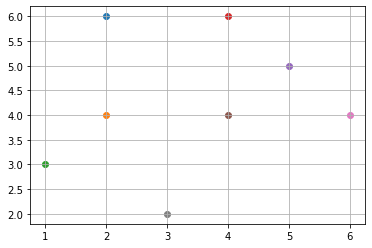

In [3]:
for i in range(len(citys)):
    plt.scatter(citys[i][0],citys[i][1])
plt.grid()

## 构建八座城市之间的距离矩阵Dxy

### 计算两点之间距离

In [4]:
def price_cn(curr_point,other_point):
    point = curr_point - other_point
    return math.hypot(point[0],point[1])

### 得到城市之间的距离矩阵 

In [5]:
def get_distance(citys):
    N = len(citys)
    distance = np.zeros((N,N))
    for i,curr_point in enumerate(citys):
        line = []
#         [line.append(price_cn(current_point,other_point)) if i!=j else line.append(0,0) for j,others_point in enumerate(citys)]
        [line.append(price_cn(curr_point, other_point)) if i != j else line.append(0.0) for j, other_point in enumerate(citys)]
        distance[i] = line
    return distance

### 利用CHNN动态方程计算输入状态的增量

In [6]:
# 动态方程计算微分方程du  
def calc_du(V, distance):  
    a = np.sum(V, axis=0) - 1  # 按列相加  
    b = np.sum(V, axis=1) - 1  # 按行相加  
    t1 = np.zeros((N, N))  
    t2 = np.zeros((N, N))  
    for i in range(N):  
        for j in range(N):  
            t1[i, j] = a[j]  
    for i in range(N):  
        for j in range(N):  
            t2[j, i] = b[j]  
    # 将第一列移动到最后一列  
    c_1 = V[:, 1:N]  
    c_0 = np.zeros((N, 1))  
    c_0[:, 0] = V[:, 0]  
    c = np.concatenate((c_1, c_0), axis=1)  
    c = np.dot(distance, c)  
    return -A * (t1 + t2) - D * c  

### 分别由一阶欧拉方法和sigmoid函数更新神经网络下个时刻的输入和输出状态

In [7]:
# 更新神经网络的输入电压U
def calc_U(U, du, step):
    return U + du * step
# 更新神经网络的输出电压V
def calc_V(U, U0):
    return 1 / 2 * (1 + np.tanh(U / U0))

### 计算当前的能量函数E

In [8]:
def calc_energy(V, distance):
    t1 = np.sum(np.power(np.sum(V, axis=0) - 1, 2))
    t2 = np.sum(np.power(np.sum(V, axis=1) - 1, 2))
    idx = [i for i in range(1, N)]
    idx = idx + [0]
    Vt = V[:, idx]
    t3 = distance * Vt
    t3 = np.sum(np.sum(np.multiply(V, t3)))
    e = 0.5 * (A * (t1 + t2) + D * t3)
    return e

### 检查当前神经网络的输出状态集合，是否满足TSP置换矩阵的规则

In [9]:
# 检查路径的正确性
def check_path(V):
    newV = np.zeros([N, N])
    route = []
    for i in range(N):
        mm = np.max(V[:, i])
        for j in range(N):
            if V[j, i] == mm:
                newV[j, i] = 1
                route += [j]
                break
    return route, newV

### 网络代码实现

In [12]:
n = 0
N = len(citys)
# 设置初始值
A = N * N
D = N / 2
U0 = 0.0009  # 初始电压
step = 0.0001  # 步长
num_iter = 10000  # 迭代次数

U = np.zeros((N,N))
V = np.zeros((N,N))
energys = np.zeros(num_iter)

distance = get_distance(citys)
# 开始迭代训练网络
while n < num_iter:
#     利用动态方程计算du
    du = calc_du(V, distance)
    #更新下个时间的输入状态（电路的输入电压U）
    U = calc_U(U, du, step)
    #更新下个时间的输出状态（电路的输出电压V）
    V = calc_V(U, U0)
    # 计算当前网络的能量E
    energys[n] = calc_energy(V, distance)
    # 检查路径的合法性
    route, newV = check_path(V)
    if len(np.unique(route)) == N:
        route.append(route[0])
        dis = calc_distance(route)
        if dis < best_distance:
            H_path = []
            best_distance = dis
            best_route = route
            [H_path.append((route[i], route[i + 1])) for i in range(len(route) - 1)]
            print('第{}次迭代找到的次优解距离为：{}，能量为：{}，路径为：'.format(n, best_distance, energys[n]))
            [print(chr(97 + v), end=',' if i < len(best_route) - 1 else '\n') for i, v in enumerate(best_route)]
    n = n + 1

1
8


NameError: name 'calc_distance' is not defined